In [1]:
import pystac

In [2]:
items = pystac.ItemCollection.from_file("search.json")

In [3]:
item = items[1]

In [6]:
href_red = item.assets["B04"].get_absolute_href()

In [9]:
href_nir = item.assets["B08"].get_absolute_href()

In [10]:
import rioxarray

In [11]:
red = rioxarray.open_rasterio(href_red, masked=True)

In [12]:
nir = rioxarray.open_rasterio(href_nir, masked=True)

In [13]:
red

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [14]:
bbox = (629_000, 5_804_000, 639_000, 5_814_000)

In [15]:
red_clip = red.rio.clip_box(*bbox)
nir_clip = nir.rio.clip_box(*bbox)

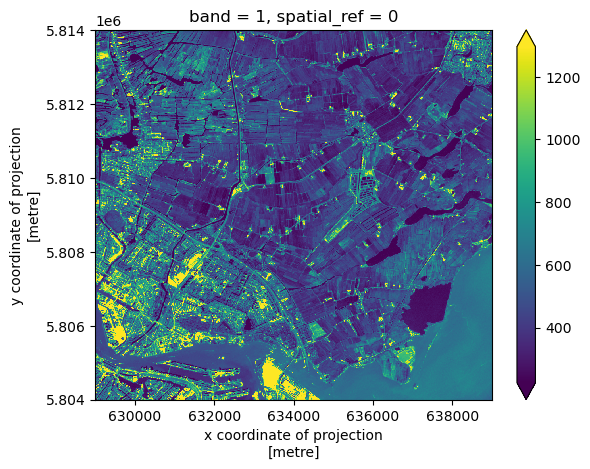

In [18]:
red_clip.plot(robust=True)

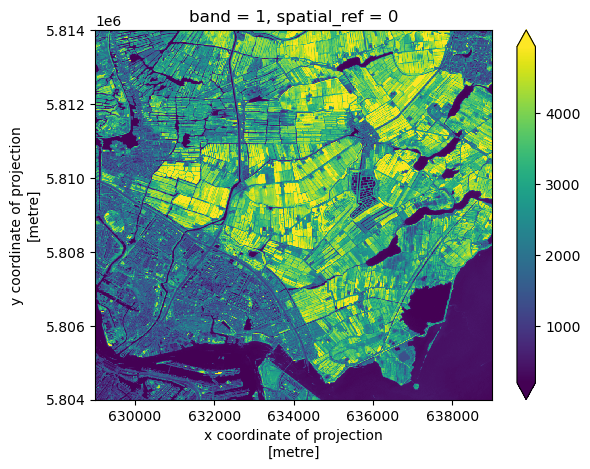

In [19]:
nir_clip.plot(robust=True)

In [20]:
red_clip.rio.crs, nir_clip.rio.crs

(CRS.from_epsg(32631), CRS.from_epsg(32631))

In [21]:
red_clip.shape, nir_clip.shape

((1, 1000, 1000), (1, 1000, 1000))

In [24]:
ndvi = (nir_clip - red_clip) / (nir_clip + red_clip)

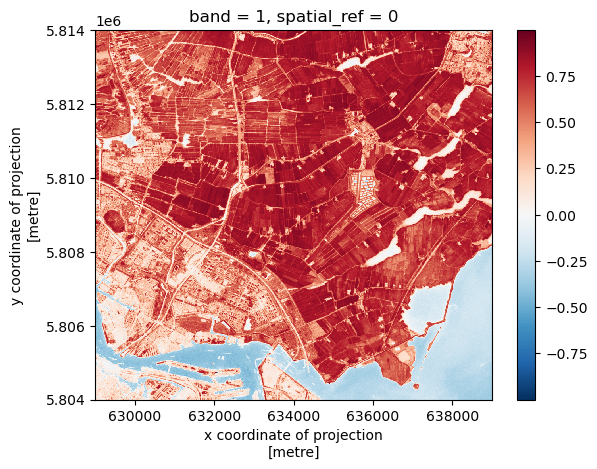

In [25]:
ndvi.plot()

(array([5.00000e+00, 2.00000e+00, 1.06730e+04, 8.93370e+04, 3.18520e+04,
        7.91100e+04, 1.11035e+05, 1.56887e+05, 3.05459e+05, 2.15636e+05]),
 array([-9.98356640e-01, -7.98577428e-01, -5.98798275e-01, -3.99019092e-01,
        -1.99239910e-01,  5.39273024e-04,  2.00318456e-01,  4.00097638e-01,
         5.99876821e-01,  7.99656034e-01,  9.99435186e-01]),
 <BarContainer object of 10 artists>)

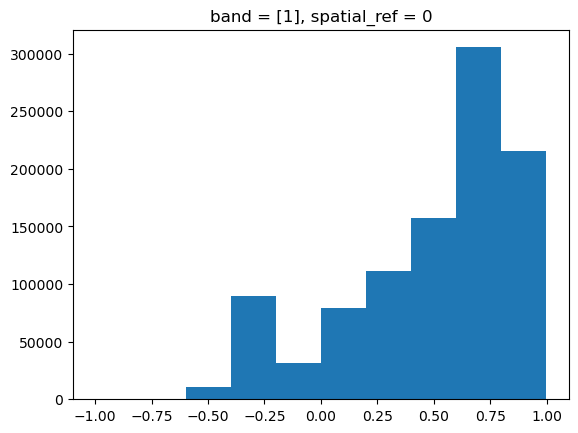

In [26]:
ndvi.plot.hist()

(array([4.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 5.00000e+00, 3.70000e+01, 1.16800e+03, 9.46300e+03,
        9.97200e+03, 1.04900e+04, 1.70760e+04, 2.09030e+04, 3.08960e+04,
        1.30130e+04, 5.67200e+03, 4.08300e+03, 3.89000e+03, 5.19400e+03,
        7.42100e+03, 1.18330e+04, 1.83560e+04, 2.01270e+04, 2.13730e+04,
        2.09520e+04, 2.13150e+04, 2.23650e+04, 2.29280e+04, 2.34750e+04,
        2.47120e+04, 2.67330e+04, 2.97430e+04, 3.48200e+04, 4.08790e+04,
        4.59290e+04, 4.99840e+04, 5.55330e+04, 6.74730e+04, 8.65400e+04,
        1.00257e+05, 8.64460e+04, 2.87080e+04, 2.21000e+02, 4.00000e+00]),
 array([-9.98356640e-01, -9.58400786e-01, -9.18444991e-01, -8.78489137e-01,
        -8.38533282e-01, -7.98577428e-01, -7.58621633e-01, -7.18665779e-01,
        -6.78709924e-01, -6.38754129e-01, -5.98798275e-01, -5.58842421e-01,
        -5.18886626e-01, -4.78930771e-01

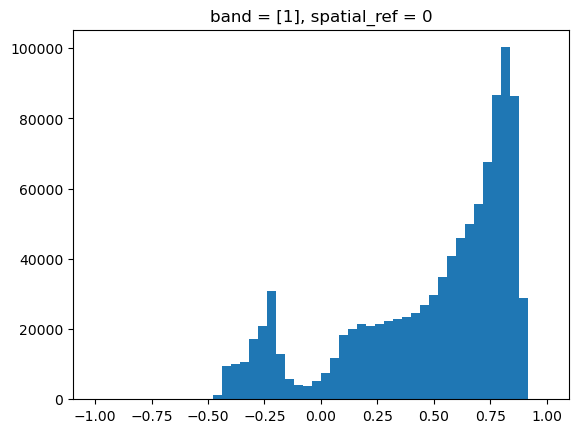

In [27]:
ndvi.plot.hist(bins=50)

In [30]:
ndvi.rio.nodata

In [36]:
mask = red_clip.isnull()

In [38]:
red_clip.where(mask, drop=True)

<xarray.DataArray (band: 1, y: 2, x: 2)>
array([[[nan, nan],
        [nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6.321e+05 6.321e+05
  * y            (y) float64 5.805e+06 5.805e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

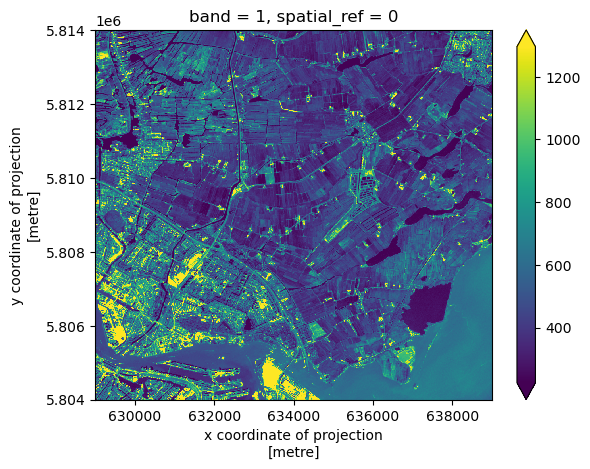

In [40]:
red_clip.plot(robust=True)

In [41]:
red_clip.x

<xarray.DataArray 'x' (x: 1000)>
array([629005., 629015., 629025., ..., 638975., 638985., 638995.])
Coordinates:
  * x            (x) float64 6.29e+05 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
    spatial_ref  int64 0
Attributes:
    axis:           X
    long_name:      x coordinate of projection
    standard_name:  projection_x_coordinate
    units:          metre

In [43]:
mask_x = red_clip.x > 634_000

In [45]:
red_clip_x = red_clip.where(mask_x)

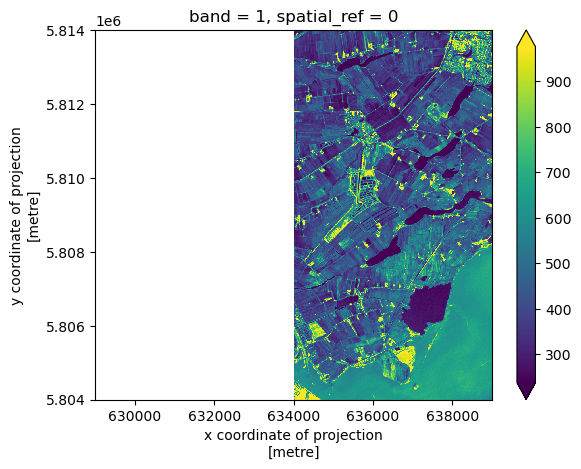

In [47]:
red_clip_x.plot(robust=True)

In [48]:
red_clip_x_dropped = red_clip.where(mask_x, drop=True)

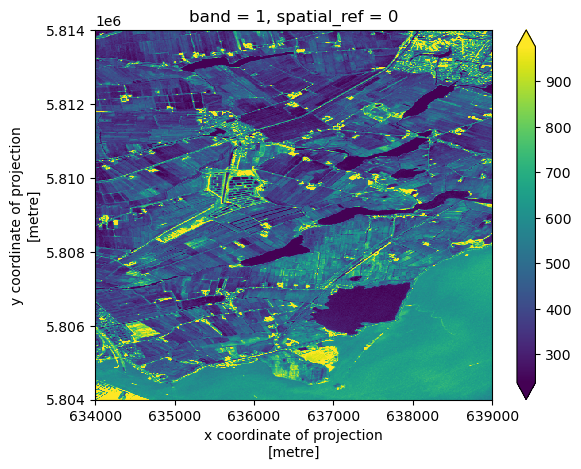

In [50]:
red_clip_x_dropped.plot(robust=True)